# Get Flashcards

should have about 70 - accidentally deleted previously downloaded files
get from backup


In [1]:
#use pip install wget
import tweepy 
import wget
import os

In [2]:
auth = tweepy.OAuthHandler('UpI7ICE8uzehsBN3Ws3fbzQdb',
                           'nSGf7HpbgSETVnveAALBAZgvyM21F7flh47ADcn5O3J3mktG0g') #Fill these in
auth.set_access_token('3221296618-YwIvGEQ7IRfYVOpWNBVFITxiHuHOIXg8vRRufLS',
                      'vm2irzzawDHOpvFA555XnnUCVV46w2fpmqBp3DPqSjSte')  #Fill these in

api = tweepy.API(auth)

#Get 200 of Chris' tweet
tweets = api.user_timeline(screen_name = 'chrisalbon', 
                           count = 200, 
                           include_rts = False, 
                           excludereplies = True)

#200 isn't enough.  Keep getting tweets until we can't get anymore

last_id = tweets[-1].id
 
while (True):
    more_tweets = api.user_timeline(screen_name='chrisalbon',
                                count=200,
                                include_rts=False,
                                exclude_replies=True,
                                max_id=last_id-1)
                                    
    # There are no more tweets
    if (len(more_tweets) == 0):
          break
    else:
        last_id = more_tweets[-1].id-1
        tweets += more_tweets
        
      

In [3]:
#Chris stopped using a hashtag and started linking a URL
def has_ML_url(s):
    urls = s.entities.get('urls')
    if urls:
        return(urls[0].get('display_url') == 'machinelearningflashcards.com')
    else:
        return False


In [4]:
#Filter by those containing machinelearningflashcards.com
card_tweets = [tweet for tweet in tweets if has_ML_url(tweet)]

In [5]:
print(type(card_tweets))

<class 'list'>


In [6]:
media_files = dict()
for status in card_tweets:
    title = status.text.split(' http')[0]
    media = status.entities.get('media', [])
    if(len(media) > 0 and media[0]['type']=='photo' ):  #if tweet has media and media is photo
        media_files[title] = media[0]['media_url']  #get me the url

In [7]:
os.makedirs('ml-cards', exist_ok=True) #make a directory to store the photos in
i=0
for title, url in media_files.items():
    i+=1
    #wget.download(url, out = "ml-cards/{}_{}.png".format(i,title)) #get the photos!
    wget.download(url, out = './ml-cards/{}.png'.format(title))

In [8]:
!pwd
path = ('./ml-cards/')
files = os.listdir(path)
print(len(files))

/Users/dexterdsilva/Documents/Developer/MachineLearning/flashcards/GetCards-master
156


In [9]:
#COPIED FROM file_admin.ipynb for ease of use 
from shutil import copyfile
BASE_DIR= '/Users/dexterdsilva/Documents/Developer/MachineLearning/flashcards/GetCards-master'
pptx_fpath= os.path.sep.join([BASE_DIR,'pptx_done'])
download_fpath = os.path.sep.join([BASE_DIR,'ml-cards'])
print(pptx_fpath)
print(download_fpath)
# file = './10_Chi-Squared For Feature Selection.png'
#os.rename(file,'ChiSquaredForFeatureSelection.png')
#filepath = './old/'
filepath = os.getcwd()
download_filelist = os.listdir(download_fpath)
pptx_filelist = os.listdir(pptx_fpath)

import glob, os
os.chdir(download_fpath)
#for file in glob.glob("*.png"):
    #print(file)

import os
for file in os.listdir(download_fpath):
    if file.endswith(".png"):
        srcfile = os.path.sep.join([download_fpath, file])
        destfile = os.path.sep.join([pptx_fpath, file])
        if os.path.exists(srcfile) and os.path.exists(destfile):
            print('--')
            os.remove(srcfile)
            #print('src= ', srcfile)
            #print('dest= ', destfile)   
            #print(os.path.join( file))
        else:
            print('src= ', srcfile)
            print('dest= ', destfile)  
            copyfile(srcfile, destfile)

#delete all files in ml-cards
        
#need to copy the new files to goodgle drive!!!
     

/Users/dexterdsilva/Documents/Developer/MachineLearning/flashcards/GetCards-master/pptx_done
/Users/dexterdsilva/Documents/Developer/MachineLearning/flashcards/GetCards-master/ml-cards
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
src=  /Users/dexterdsilva/Documents/Developer/MachineLearning/flashcards/GetCards-master/ml-cards/Gradient Descent Rule Of Thumb.png
dest=  /Users/dexterdsilva/Documents/Developer/MachineLearning/flashcards/GetCards-master/pptx_done/Gradient Descent Rule Of Thumb.png
--
--
--
--
--
--
--
src=  /Users/dexterdsilva/Documents/Developer/MachineLearning/flashcards/GetCards-master/ml-cards/Jacobian Matrix.png
dest=  /Users/dexterdsilva/Documents/Developer/MachineLearning/flashcards/GetCards-master/pptx_done/Jacobian Matrix.png
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
src=  /Users/de

OLD METHOD BELOW

In [ ]:
#COPIED FROM file_admin.ipynb for ease of use 
from shutil import copyfile
BASE_DIR= '/Users/dexterdsilva/Documents/Developer/MachineLearning/flashcards/GetCards-master'
pptx_fpath= os.path.sep.join([BASE_DIR,'pptx_done'])
download_fpath = os.path.sep.join([BASE_DIR,'ml-cards'])
print(pptx_fpath)
print(download_fpath)
# file = './10_Chi-Squared For Feature Selection.png'
#os.rename(file,'ChiSquaredForFeatureSelection.png')
#filepath = './old/'
filepath = os.getcwd()
download_filelist = os.listdir(download_fpath)
pptx_filelist = os.listdir(pptx_fpath)

downloaded=len(download_filelist)
exists = 0
notExists=0
for item in download_filelist:
    #if exists and is a file andnot directory
    if os.path.exists(os.path.sep.join([pptx_fpath, item])) and os.path.isfile(os.path.sep.join([pptx_fpath, item])):
        #print('{} exists in pptx'.format(item))
        exists +=1
    else:
        print('{} does not exist in pptx'.format(item))
        notExists+=1
         
print('{} does not exist in pptx'.format(notExists))

print('\n','COPY THESE MANUALLY INTO DONE PPTX AFTER CHECKING AND INSERTING IN PPT')

        

In [ ]:
#24 SEPT 2019

#COPY TO ONEDRIVE - DDSILVA.HTC  3--F---d!

In [14]:
## END OF SCRIPTS

# RENAME IMAGES BY ADDING A NUMBER_

In [8]:
from IPython.core.display import Image, display
#Image('./ml-cards/Notation 5.png') for arrays

5_Word2Vec.png 
----
./ml-cards/19_Aggomerative Clustering.png
./ml-cards/5_Word2Vec.png
./ml-cards/10_Tomek Link.png
./ml-cards/.DS_Store
./ml-cards/3_Variance.png
./ml-cards/11_Overfitting.png
./ml-cards/20_Dataset Augmentation.png
./ml-cards/23_Interquartile Range.png
./ml-cards/24_Precision.png
./ml-cards/12_Epoch.png
./ml-cards/old
./ml-cards/22_Lasso For Feature Selection.png
./ml-cards/18_Grabcut.png
./ml-cards/1_When N Equals Population.png
./ml-cards/8_Chi-Squared For Feature Selection.png
./ml-cards/2_Total Sum-Of-Squares.png
./ml-cards/14_Simpsons Paradox.png
./ml-cards/16_Support Vector Machine Soft-Margin Classification.png
./ml-cards/13_Meanshift Clustering By Analogy.png
./ml-cards/21_Determinants.png
./ml-cards/15_Gradient Cliff.png
./ml-cards/7_Design Matrix.png
./ml-cards/6_Imputation Using k-NN.png
./ml-cards/17_One-Vs-Rest Logistic Regression.png
./ml-cards/9_T-Statistic.png
./ml-cards/4_K-Nearest Neighbors Tips And Tricks.png


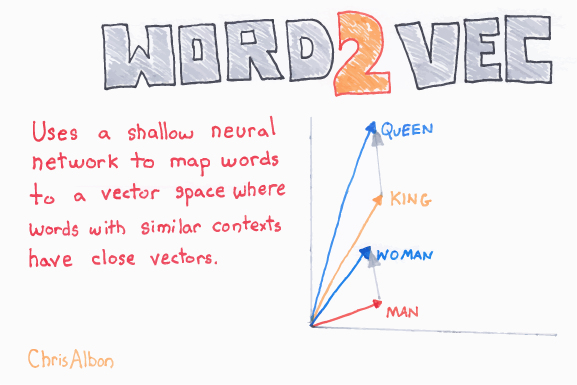

In [14]:
#try to load all images into jupyter notebook
from IPython.core.display import Image, display

path = "./ml-cards/"

imagesList = os.listdir(path)
print(imagesList[1] ,'\n----')

# your images in an array
for img in imagesList:
    print(path + img)
    Image( 'path + img')

Image(path + imagesList[0] , '\n----*20')
Image(path + imagesList[1])

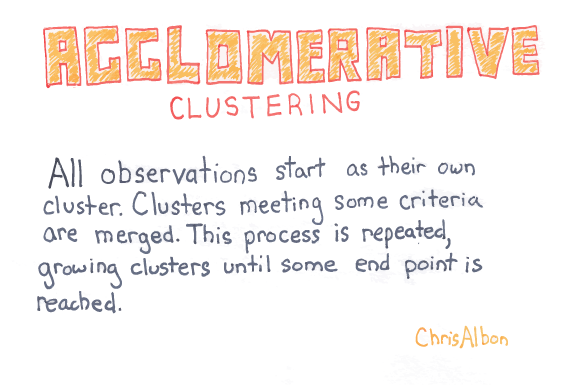

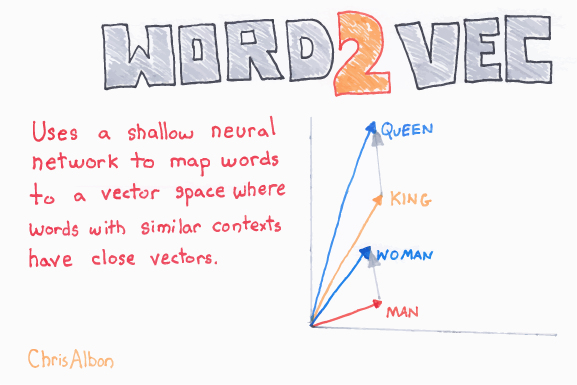

In [15]:
from IPython.core.display import Image, display
import  matplotlib.pyplot as plt
%matplotlib inline
path = "./ml-cards/"
imagesList = os.listdir(path)

x= Image(path + imagesList[0])
y= Image(path + imagesList[1])
display(x,y)


24_Interquartile Range.png -----------------------------------


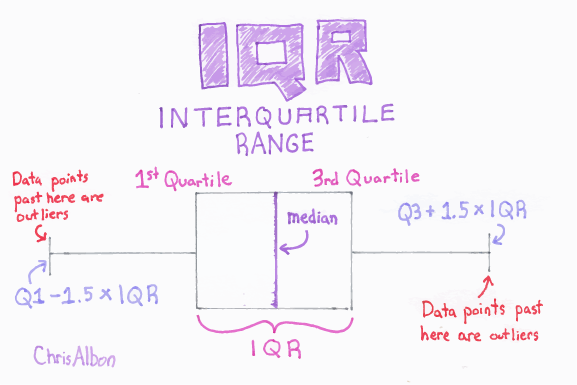

16_Word2Vec.png -----------------------------------


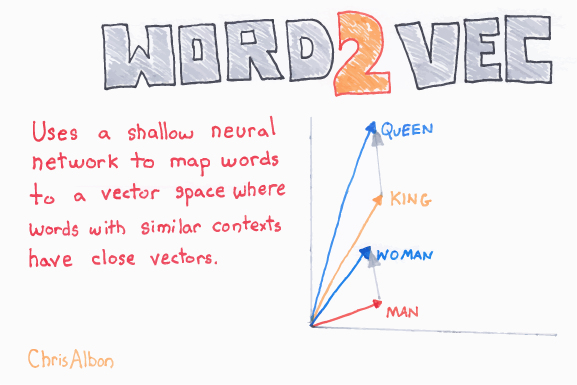

11_Support Vector Machine Soft-Margin Classification.png -----------------------------------


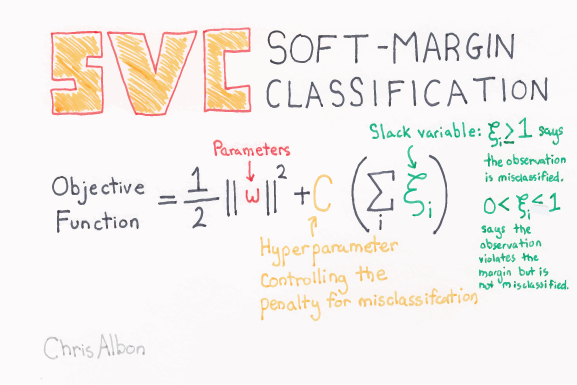

10_Chi-Squared For Feature Selection.png -----------------------------------


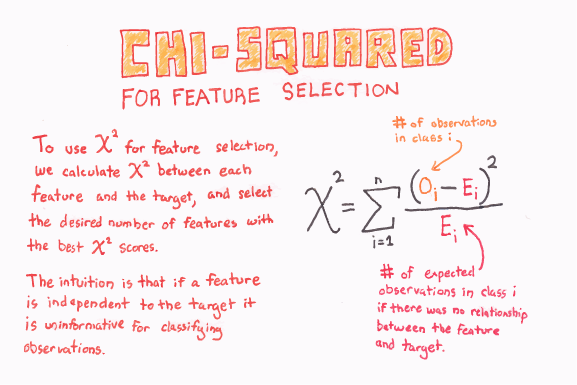

1_Precision.png -----------------------------------


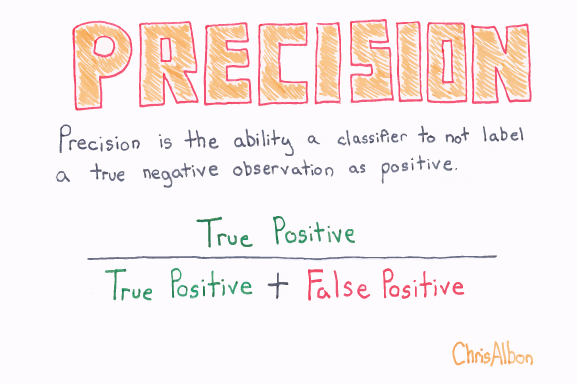

9_Aggomerative Clustering.png -----------------------------------


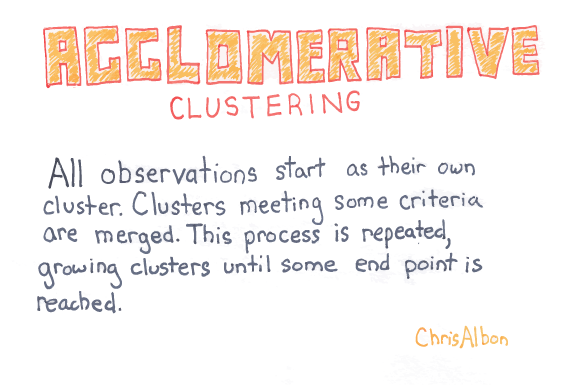

3_When N Equals Population.png -----------------------------------


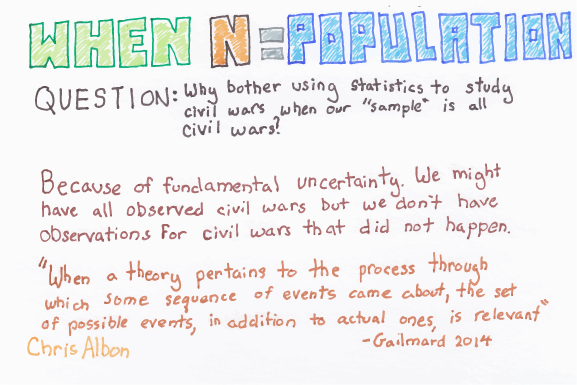

13_Tomek Link.png -----------------------------------


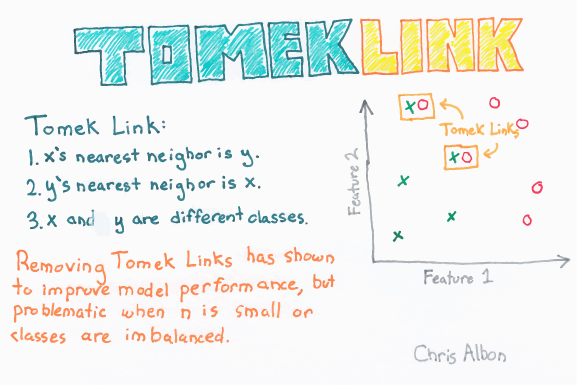

19_Saddle Point.png -----------------------------------


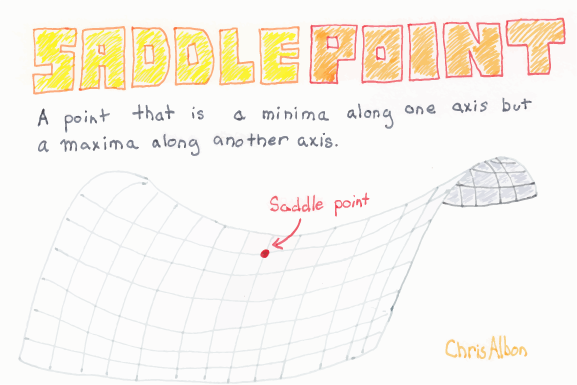

21_Typical Dropout Probabilities.png -----------------------------------


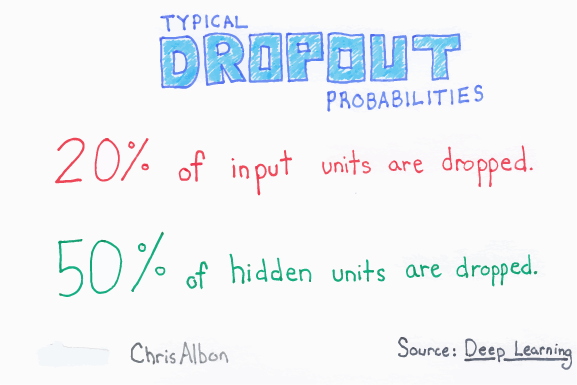

23_Training And Test Error.png -----------------------------------


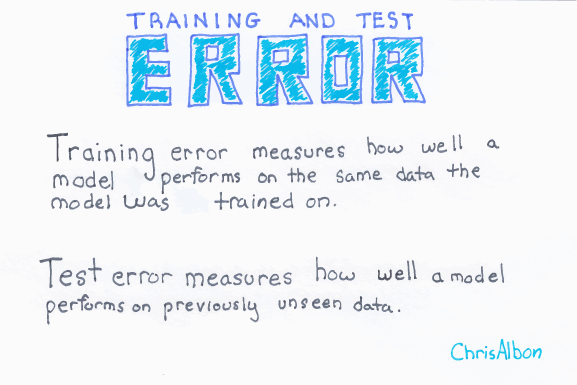

15_Dataset Augmentation.png -----------------------------------


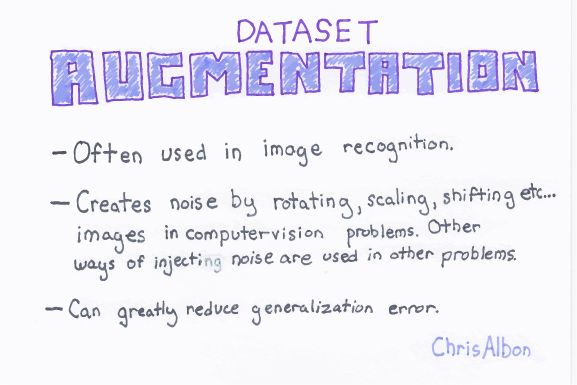

5_Epoch.png -----------------------------------


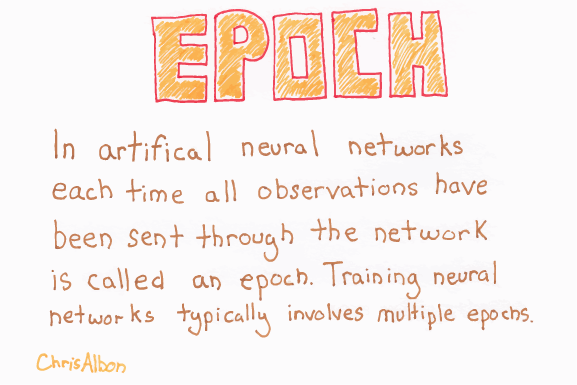

4_Imputation Using k-NN.png -----------------------------------


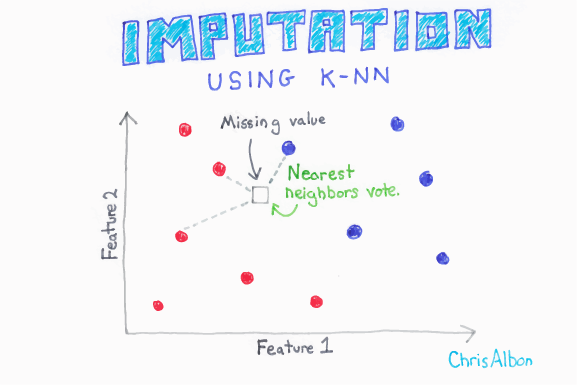

2_Overfitting.png -----------------------------------


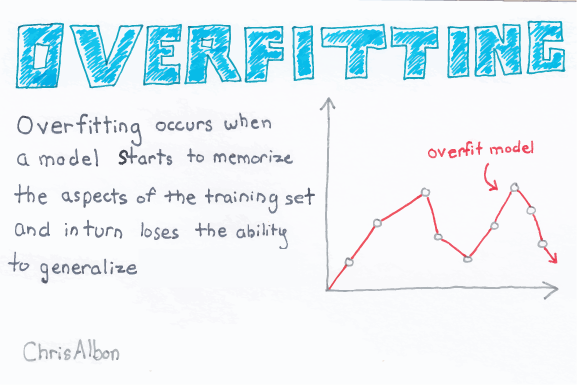

17_F1 Score.png -----------------------------------


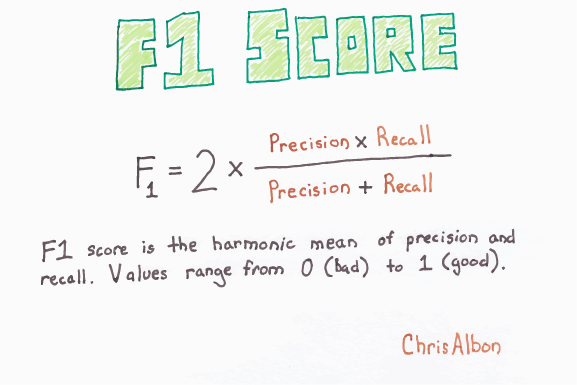

12_Variance.png -----------------------------------


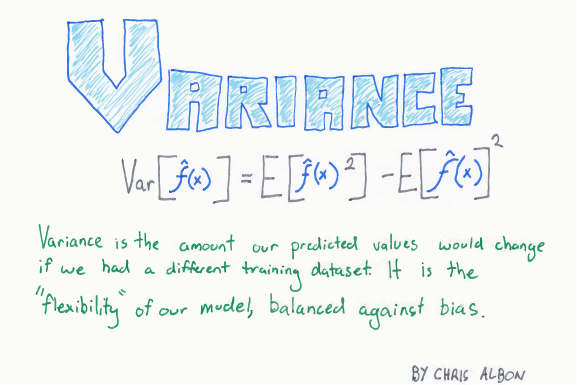

20_ELUs.png -----------------------------------


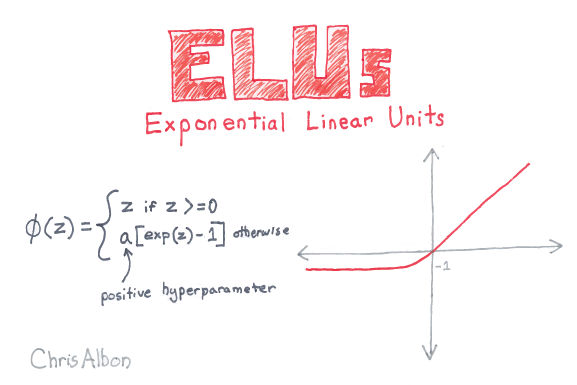

6_Meanshift Clustering By Analogy.png -----------------------------------


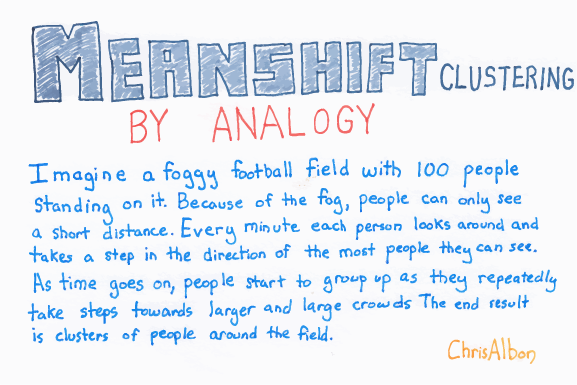

7_Design Matrix.png -----------------------------------


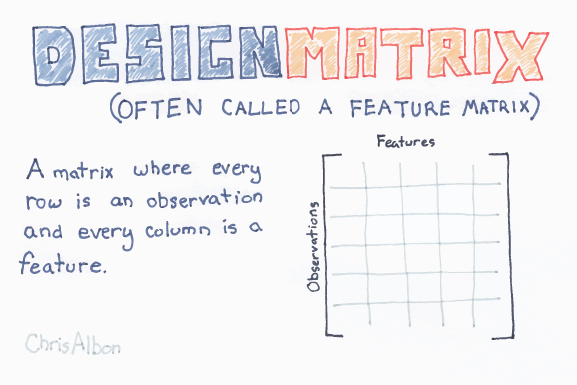

22_Upsampling.png -----------------------------------


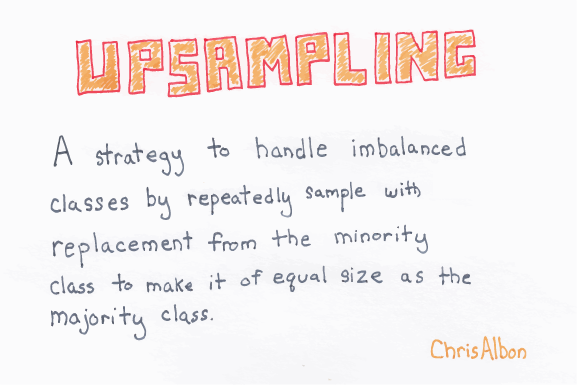

14_K-Nearest Neighbors Tips And Tricks.png -----------------------------------


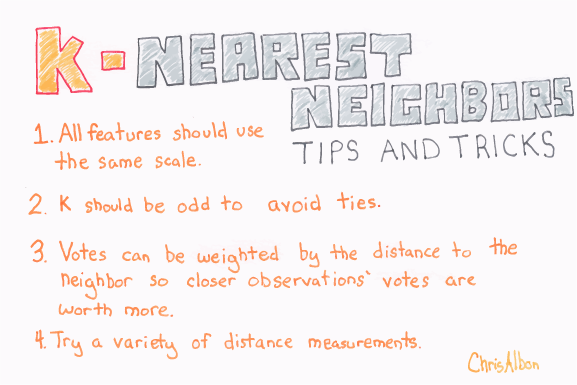

8_Gradient Cliff.png -----------------------------------


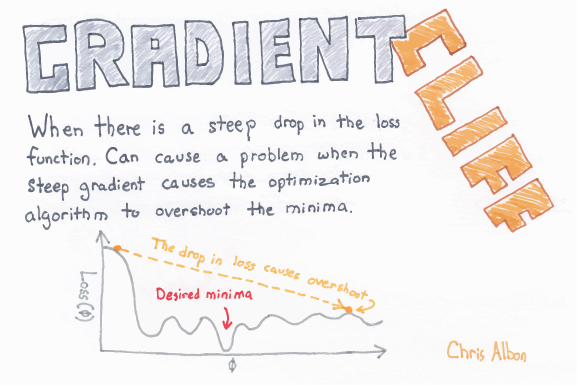

18_Standard Error Of The Mean.png -----------------------------------


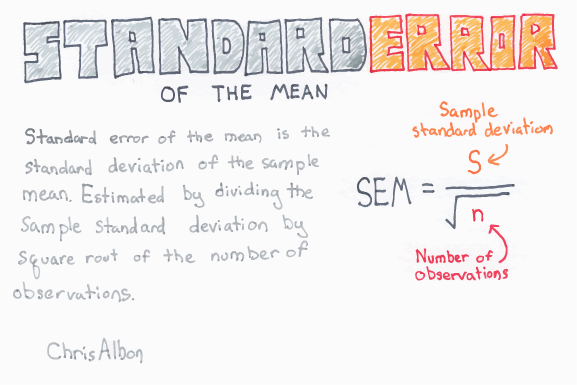

In [63]:
path = "./ml-cards/"
imagesList = os.listdir(path)
                        
for i in range(len(imagesList)):
    image_name =imagesList[i]
    if image_name != 'old':
        image = Image(path + imagesList[i]) 
        print(image_name ,'-------'*5)
        display(image)


In [12]:
import os
path = "./ml-cards2/"
imagesList = os.listdir(path)
i = 0
for file in imagesList:
    print(file , '\n', '-----'*10)
    display(Image(filename=os.path.join(path, file)))
    i += 1
    
print (i, '  files found')

0   files found


In [14]:
#This shows images as new pop-ups
from os import listdir
from PIL import Image as PImage

def loadImages(path):
    # return array of images

    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        img = PImage.open(path + image)
        loadedImages.append(img)

    return loadedImages

path = "./ml-cards/"

# your images in an array
imgs = loadImages(path)

for img in imgs:
    # you can show every image
    img.show()